In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST

# Loading Data

In [2]:
train_data = FashionMNIST(root = './Data', download=True, train=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=0.2860, std=0.3530)]))
test_data = FashionMNIST(root = './Data', download=True, train=False, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=0.2860, std=0.3530)]))

print('Size of Train Data = ', len(train_data))
print('Size of Test Data = ', len(test_data))

Size of Train Data =  60000
Size of Test Data =  10000


# EDA

In [3]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

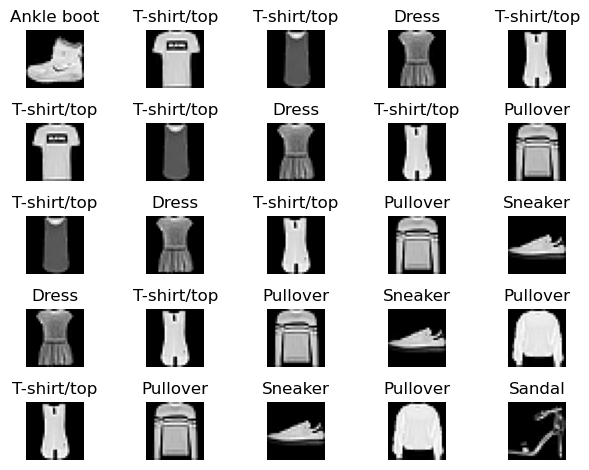

In [4]:
fig, ax = plt.subplots(nrows = 5, ncols = 5)
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(train_data.data[i+j], cmap='gray')
        ax[i,j].set_title(train_data.classes[train_data.targets[i+j].item()])
        ax[i, j].axis('off')

plt.tight_layout()
plt.show()

## Test ResNet

In [5]:
from torchvision.models import resnet18
# Weights from https://download.pytorch.org/models/resnet18-f37072fd.pth

model = resnet18()
model.load_state_dict(torch.load('./Data/Models/resnet18-f37072fd.pth'))
model.to('cuda')

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
loader = DataLoader(train_data, len(train_data), shuffle=False)

with torch.no_grad():
    for X, y in loader:
        X = X.repeat(1, 3, 1, 1).to('cuda')
        print(X.shape)
        features = model(X)

print(features.shape)

torch.Size([60000, 3, 28, 28])
torch.Size([60000, 1000])


: 